In [2]:
cd /content/drive/My Drive/Torch_tutorials/Building_network_for_MNIST

/content/drive/My Drive/Torch_tutorials/Building_network_for_MNIST


In [3]:
!pwd

/content/drive/My Drive/Torch_tutorials/Building_network_for_MNIST


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt


In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Lambda(lambda x: x.repeat(3,1,1)),
    transforms.Normalize(mean=(0.5,),std=(0.5,))
])
trainset = torchvision.datasets.MNIST(root='./',train=True,
                                      download=True,transform=transform)
testset = torchvision.datasets.MNIST(root='./',train=False,
                                     download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,
                                          shuffle=True)# DataLoader注意大小写
testloader = torch.utils.data.DataLoader(testset,batch_size=64,
                                         shuffle=True)
classes = ('0','1','2','3','4','5','6','7','8','9')

['5', '9', '2', '3', '9', '1', '4', '7', '5', '7', '7', '7', '2', '6', '7', '2', '0', '1', '2', '7', '7', '6', '8', '9', '9', '6', '5', '0', '6', '0', '5', '5', '7', '4', '1', '6', '7', '5', '5', '8', '8', '5', '3', '3', '6', '8', '4', '1', '2', '5', '2', '2', '5', '7', '7', '9', '8', '6', '4', '9', '8', '1', '5', '4']


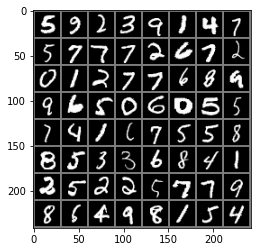

In [ ]:
dataiter = iter(trainloader)
images,labels = dataiter.next()
img = torchvision.utils.make_grid(images)
img = img.numpy()# 此处不可用缩写
img = np.transpose(img,(1,2,0))# 在下载数据集时，经过了transform，PILimage格式的数据已经变成了Tensor格式，现在需要转换回来
# 就是通过变换通道顺序来实现
mean = (0.5,)
std = (0.5,)
img = img*std+mean
plt.imshow(img)
print([classes[labels[i]] for i in range(64)])


In [ ]:
class Net(nn.Module):
  '''This class defines the structure of the network.'''
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(1,6,kernel_size=3,stride=1,padding=1)
    self.pool = nn.MaxPool2d(kernel_size=2,stride=2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,85)
    self.fc3 = nn.Linear(85,10)
  def forward(self,x):
    x = self.pool(f.relu(self.conv1(x)))
    x = self.pool(f.relu(self.conv2(x)))
    x = x.view(-1,16*5*5)
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = self.fc3(x)
    return x
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=85, bias=True)
  (fc3): Linear(in_features=85, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [ ]:
num_epoch = 2
for epoch in range(num_epoch):
  running_loss = 0.0
  for i,data in enumerate(trainloader,0):
    inputs,labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    if i%200 == 199:
      print('[epoch:%d,iteration:%d],loss=%.5f' %(epoch+1,i+1,running_loss/200))
      #把浮点数f写成整数d就看不到loss了，会看到loss一直为0
      running_loss = 0
print('Finished Training.')

[epoch:1,iteration:200],loss=0.04975
[epoch:1,iteration:400],loss=0.04574
[epoch:1,iteration:600],loss=0.04571
[epoch:1,iteration:800],loss=0.04383
[epoch:2,iteration:200],loss=0.04570
[epoch:2,iteration:400],loss=0.04458
[epoch:2,iteration:600],loss=0.04493
[epoch:2,iteration:800],loss=0.04716
Finished Training.


In [ ]:
PATH = './model/mnist_net.pth'
torch.save(net.state_dict(),PATH)

使用训练好的模型时，就不需要定义损失函数、优化器、训练步骤。而只需要一个网络net，然后执行下面代码加载模型，即可获得一个可使用的网络，此时你输入图片就可以得到输出了。

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

GroundTruth:      5     6     2     1     4     5     9     8     8     4     1     9     5     2     4     7     5     2     8     8     8     6     6     2     9     9     0     6     8     2     2     3     3     4     9     2     9     8     6     6     6     2     1     8     6     3     9     8     3     2     4     9     5     5     6     2     7     9     9     2     9     9     3     0


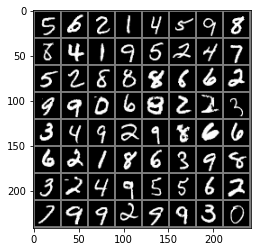

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
img = torchvision.utils.make_grid(images)
img = img.numpy()# 此处不可用缩写
img = np.transpose(img,(1,2,0))
mean = (0.5,)
std = (0.5,)
img = img*std+mean
plt.imshow(img)
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(64)))

In [ ]:
outputs = net(images)
#print(outputs.size)

<built-in method size of Tensor object at 0x7fd60f906438>


In [ ]:
_,predicted = torch.max(outputs,1)
print('predicted: ',
      '  '.join('%s' % classes[predicted[i]] for i in range(64)))# 这种打印循环的方法要学会！

predicted:  5  6  2  1  4  5  9  8  8  4  1  9  5  2  4  7  5  2  8  0  8  6  6  2  9  9  0  6  8  2  2  3  3  4  9  2  9  8  6  6  6  2  1  8  6  3  9  8  3  2  4  9  5  5  6  2  7  9  9  2  9  9  3  0


In [ ]:
correct = 0
total = 0
with torch.no_grad():#取消对以下所有tensor的求导
  for data in testloader:
    images,labels = data
    outputs = net(images)
    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of the network on all the test images:%.3f' % (correct/total))# 百分号里的内容记得加括号


Accuracy of the network on all the test images:0.984
